# Yuri Santana Lopes - 222009750 - 2ºPeriodo - Desafio de Clustering

## Importação de Bibliotecas e arquivos do drive

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [4]:
file_id = "1JVJ54EkoqdUE2iq1raV2W3VxrJejDXj3"
url = f"https://drive.google.com/file/d/{file_id}/view"
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"

students = pd.read_csv(download_url)

## Atividades Obrigatórias

### Etapa 1 - Visualização dos dados e colunas

In [3]:
students.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


Observando os dados dispostos neste dataset através do comando .head(), consigo perceber que de fato exsitem muitas colunas neste arquivo.
Como o objetivo do dataset é fazer uma relação do rendimento acadêmico com os hábitos do estudante, creio que o grande número de colunas presentes neste dataset seja com a intenção de conseguir diferentes perfis de estudantes e comparar os seus resultados. Essa ideia vem de que, ao coletar mais dados sobre os estudantes, é possível descobrir mais sobre o estilo de vida adotado por eles, de tal maneira que aumenta a possibilidade de tentar encontrar algum parâmetro que possa revelar a correlação entre alguns de seus hábitos com o rendimento acadêmico.
Logo, o grande número de dados presentes neste dataset foi uma maneira de tentar englobar os diferentes tipos de estudantes que podem existir em uma instituição acadêmica. Consquentemente, no final do projeto, os dados presentes aqui devem ser separados em muitos grupos diferentes por conta de que esse dataset fez por onde abranger diferentes tipos de estudantes.

In [4]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

Adicionalmente, utilizei o método .info() para obter informações precisas sobre todas as colunas presentes neste dataset, logo acredito que através deste comando eu pude ter uma plena ideia sobre todas as colunas existentes neste dataset. Outra coisa a se observar como bonus, e que praticamente todas, com exceção do parental_education_level estão totalmente preenchidas de dados.

In [5]:
students.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


Através do método .describe(), eu consegui ter uma visão das estatísticas distribuídas para cada uma das colunas, assim, pude observar a existência de valores médios, desvios, mínimos, máximos e etc para cada uma das colunas numéricas apresentadas.

### Etapa 2 - Análise por EDA

Para a análise EDA, vou buscar por contabilizar todos os valores nulos que existirem nas tabelas e verificar por possíveis outliers através dos gráficos.
Inicialmente vou começar com uma análise dos Valores Nulos no dataset.

#### 2.1 - Valores nulos

Primeiramente, quero contabilizar todos os valores nulos que existem em todas as colunas da tabela.

In [3]:
students.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

Em seguida, para ter uma boa ideia da porporção de valores nulos, eu aplico o .mean() para verificar a média de valores médios existentes por coluna.

In [10]:
students.isnull().mean()

student_id                       0.000
age                              0.000
gender                           0.000
study_hours_per_day              0.000
social_media_hours               0.000
netflix_hours                    0.000
part_time_job                    0.000
attendance_percentage            0.000
sleep_hours                      0.000
diet_quality                     0.000
exercise_frequency               0.000
parental_education_level         0.091
internet_quality                 0.000
mental_health_rating             0.000
extracurricular_participation    0.000
exam_score                       0.000
dtype: float64

Através desta análise dos valores nulos existentes por coluna, pode-se notar que a única coluna em que apresentou valores nulos foi a de parental_education_level. Certamente durante a coleta dos dados, os entrevistados devem ter deixado este campo em branco. Talvez em parte por não saberem ou então por não quererem revelar essa informação mesmo.

#### 2.2 - Outliers presentes no dataset

Em seguida, partimos para análise dos Outliers presentes no dataset.
Para fazer essa análise eu decidi escolher o boxplot para tentar ir em busca dos outliers.
Eu geralmente escolho representar os outliers através do Boxplot, já que esse tipo de gráfico me permite ter uma excelente visualização de como que os dados estão distribuídos. Já que assim, é possível identificar facilmente dados que se sobressaem muito em um boxplot, sendo assim possível identificar os data points necessários para investigação.

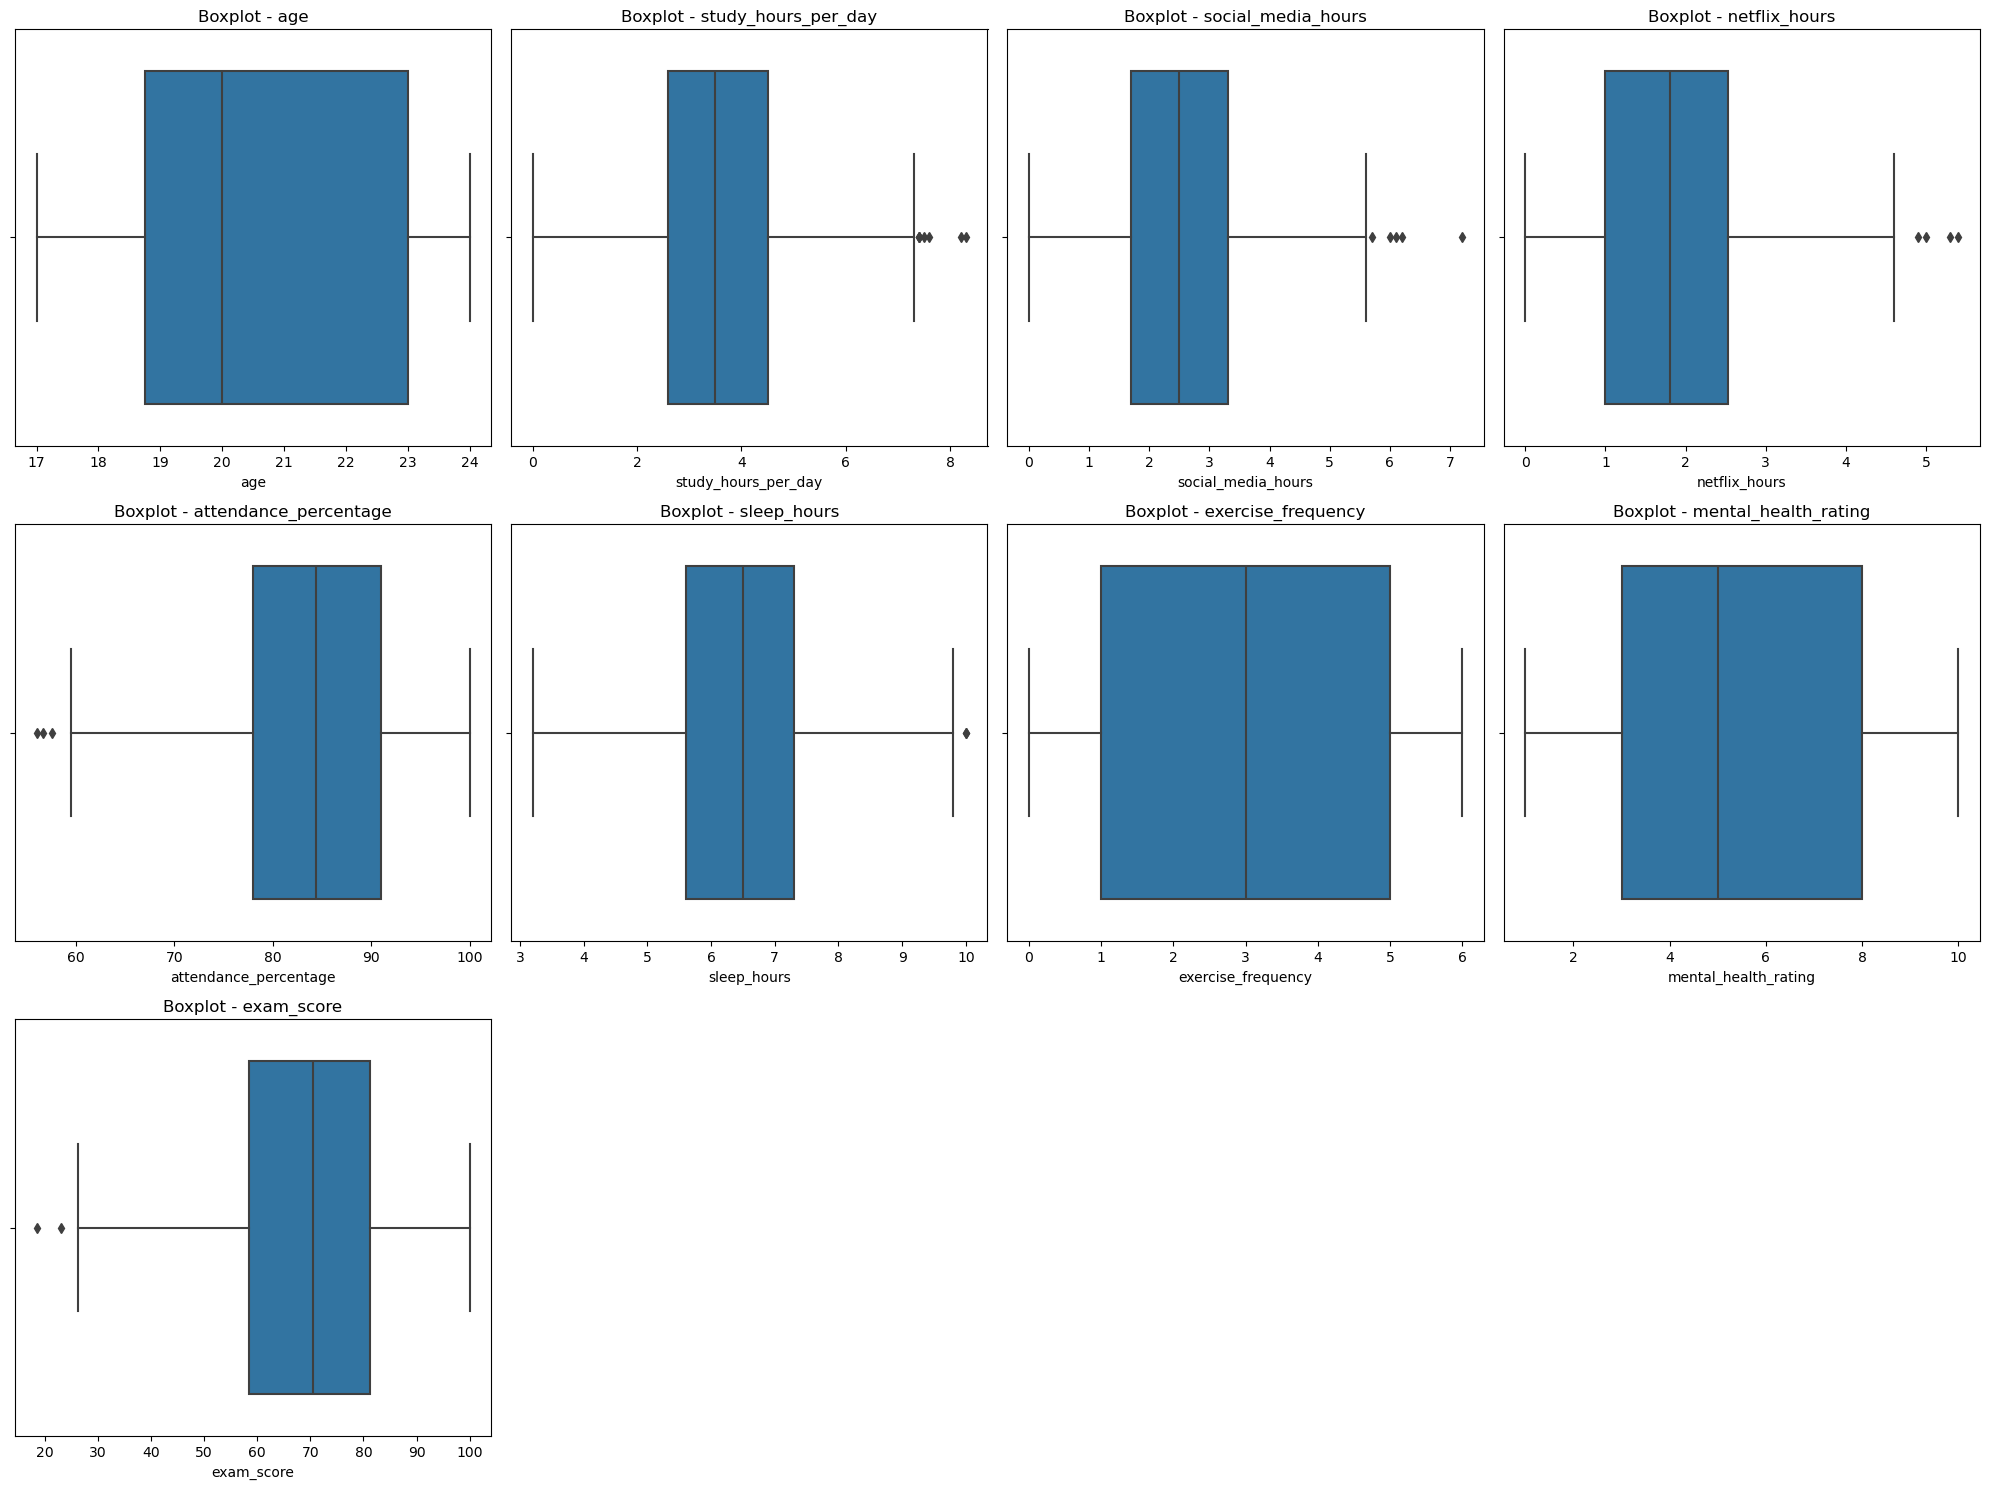

In [27]:
def plotarGraficosOutliers(students):
        
    #seleção de colunas numéricas do dataframe
    cols_numerics = students.select_dtypes(include=['number','float64']).columns

    num_cols = len(cols_numerics)
    cols_per_row = 4
    rows = (num_cols + cols_per_row -1) // cols_per_row 

    fig,axes = plt.subplots(rows,cols_per_row,figsize=(5*cols_per_row,5*rows))
    axes = axes.flatten()

    for i, col in enumerate(cols_numerics):
        sns.boxplot(data=students, x=col, ax=axes[i])
        axes[i].set_title(f'Boxplot - {col}')

    # Ocultar os que não forem numéricos
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
plotarGraficosOutliers(students)

### Etapa 3 - Hipótese da EDA

Na etapa 2, eu adotei a análise dos valores nulos e dos Outliers presentes no dataset de students. E, através deles, pude observar que este conjunto de dados é, em maior parte, bastante condizente. 
Assim como foi apresentada na etapa 2.1, a maior parte dos dados presentes neste dataset está completa, restando apenas a coluna de parental_education_level como a coluna que possui dados faltantes.
Além disso, ao observar os expostos na etapa 2.2, pude verificar que de fato os dados estão em uma distribuição muito boa. Não existem muitos valores que saem dos limites do gráfico e que atuam como outliers.

Ou seja, de modo geral, os dados estão condizentes e estão muito bem distribuídos, existindo apenas alguns poucos dados que estão sendo tratados como Outliers.

### Etapa 4 - Construção do algorítmo de K-Means

Agora que já realizei toda a etapa de EDA, seguirei adiante com a construção do algoritmo de K-Means.
Primeiramente, como o dataset apresenta alguns valores com linhas nulas, eu irei remover essas linhas para não prejudicar o algoritmo do K-Means, já que esse algoritmo não se relaciona bem com valores nulos

#### Remoção de valores nulos e escalação do dataset

In [5]:
features = students.columns

students_u = students.dropna(subset=features)

#escalação do dataset para evitar proeminencia de valores muito grandes no algoritmo
numeric_cols = students_u.select_dtypes(include='number').columns

students_u[numeric_cols] = ((students_u[numeric_cols] - students_u[numeric_cols].min()) / (students_u[numeric_cols].max() - students_u[numeric_cols].min())) * 5 + 1


C:\Users\Yuri\AppData\Local\Temp\ipykernel_18272\568046868.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  students_u[numeric_cols] = ((students_u[numeric_cols] - students_u[numeric_cols].min()) / (students_u[numeric_cols].max() - students_u[numeric_cols].min())) * 5 + 1


### 

##### Opcional : Plotagem de gráficos sem valores nulos

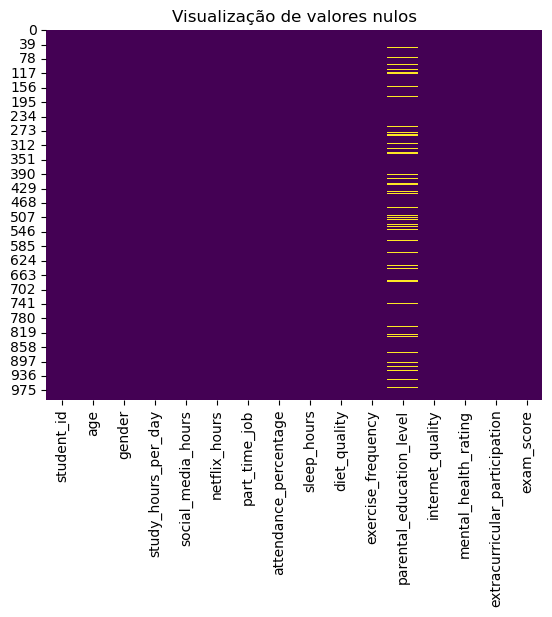

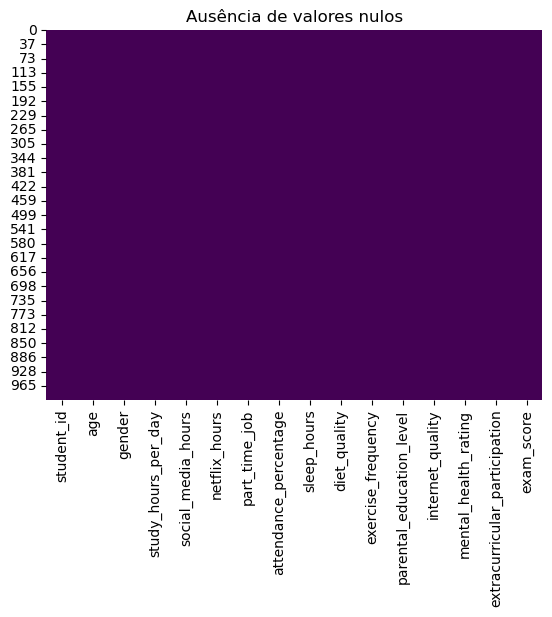

In [6]:
sns.heatmap(students.isnull(),cbar=False,cmap='viridis')
plt.title('Visualização de valores nulos')
plt.show()

sns.heatmap(students_u.isnull(),cbar=False,cmap='viridis')
plt.title('Ausência de valores nulos')
plt.show()

Com base no gráfico mostrado aqui, adotei o valor de K = 4, já que este valor ainda apresenta uma curva mais suave e parece ser um valor mais promissor para a proposta da questão.

#### Criação de centroides

Em seguida, parti para a criação de centroides dispostas aleatóriamente sobre os pontos de dados.
A função get_labels recebe os dados e os centróides atuais, assim ela calcula a distância euclidiana sobre cada ponto em relação a cada uma das centróides e atribui um rótulo ao indíce do centroide mais próximo.
Além disso, a função new_centroids recebe os dados, os rótulos de cluster e o número de Clusters. Ela calcula um novo centróide de cada cluster como a média dos pontos percentes a ele.

Em minha abordagem, decidi usar k = 4.
O código também separa apenas as colunas do dataframe que possuem dados para fazer o agrupamento.
Novos centroides são calculados a metida que o código é executado e o algoritmo de k-Means é efetuado por até 10 iterações.
Assim, se os centróides não mudarem, considera-se que houve convergência para a iteração.
Quando a iteração acaba ela também adiciona rótulos dos clusters ao dataframe original.

In [8]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda c: np.linalg.norm(data.values - c.values, axis=1))
    labels = distances.idxmin(axis=1)
    labels.index = data.index 
    return labels
def new_centroids(data, labels, k):
    centroids = []
    for i in range(k):
        cluster_points = data[labels == i]
        centroid = cluster_points.mean()
        centroids.append(centroid)
    return pd.DataFrame(centroids).T


k = 4
data_numeric = students_u.select_dtypes(include='number').copy()
centroids = random_centroids(data_numeric, k)

for iteration in range(10):
    labels = get_labels(data_numeric, centroids)
    new_c = new_centroids(data_numeric, labels, k)

    if new_c.equals(centroids):
        print(f"Convergiu na iteração {iteration}")
        break
    
    centroids = new_c

# Adiciona os rótulos ao dataframe original
students_u['cluster'] = labels




Convergiu na iteração 9


C:\Users\Yuri\AppData\Local\Temp\ipykernel_18272\1743045340.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  students_u['cluster'] = labels


Este código define e executa a função plot_clusters, responsável assim por gerar a visualização dos dados em um gráfico 2D.
O PCA foi utilizado para atribuir a dimensão correta aos dados que não estavam mais em 2D, reduzindo assim os dados e os centróides para um modelo que poderia ser plenamente representável em um plano cartesiano.
Os pontos representando os dados são plotados através do seaborn e coloridos de acordo com seus respectivos clusters. Os centróides estão marcados com um grande "X" na cor preta.
No fim, o gráfico mostra a distribuição dos diferentes grupos em um cluster.

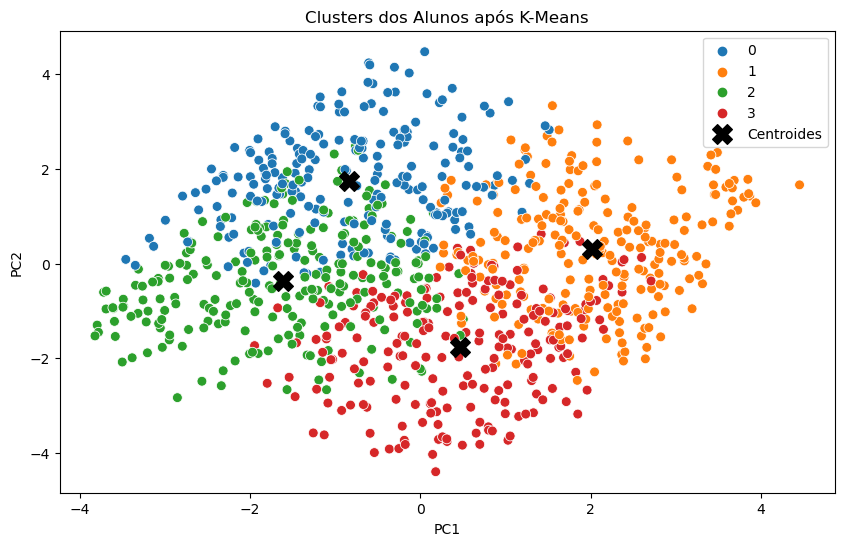

In [9]:
def plot_clusters(data, labels, centroids):
    # Reduz os dados para 2D com PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)
    reduced_centroids = pca.transform(centroids.T)

    # Cria um DataFrame para facilitar a plotagem
    plot_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
    plot_df['cluster'] = labels.values

    # Plotando os pontos
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='cluster', palette='tab10', s=50)

    # Plotando os centróides
    plt.scatter(reduced_centroids[:, 0], reduced_centroids[:, 1], c='black', marker='X', s=200, label='Centroides')
    plt.title('Clusters dos Alunos após K-Means')
    plt.legend()
    plt.show()

plot_clusters(data_numeric, labels, centroids)



### Etapa 5 - Justificativa do valor adotado para K-Mean

Aqui eu apresento o meu modelo gráfico onde tento justificar o valor escolhido para k = 4.
Como pode ser observado pelo gráfico disposto a baixo, nota-se que a inércia onde K = 4 se apresenta como um intervalo com um declive interessante, já que lá é tido como um ponto de interesse em razão de sua declividade ser relavativamente suave em relação aos demais.

#### Gráfico de cotovelo para o modelo

In [10]:
import os
os.environ["OMP_NUM_THREADS"] = "4" #Evitar vazamento de memória que acabou de ser apontado como um erro aqui

c:\Users\Yuri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Yuri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Yuri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Yuri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

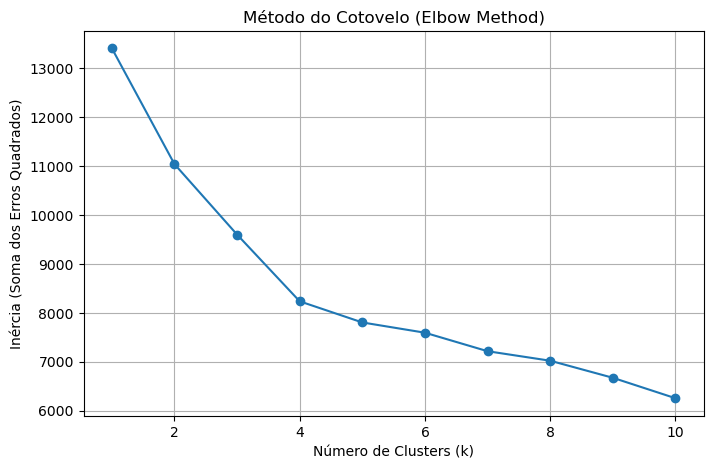

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Use apenas as colunas numéricas
numeric_cols = students_u.select_dtypes(include='number').columns
X = students_u[numeric_cols]

inertias = []

# Testa diferentes valores de k (número de clusters)
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Cria o gráfico do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia (Soma dos Erros Quadrados)')
plt.title('Método do Cotovelo (Elbow Method)')
plt.grid(True)
plt.show()


Como pôde ser observado no gráfico, escolhi o valor 4 pois ele é o que melhor representa ainda uma curva neste gráfico de cotovelo que foi construído. Assim, ele ainda permite que consigamos analisar os dados do dataset e dividí-lo em 4 diferentes grupos.

### Etapa 6 - Revisão das hipóteses inciais

No final do processo, os dados foram devidamente tratados, visualizados e agrupados em diferentes clusters, com cada grupo representando padrões distintos segundo o algoritmo de *k-means*. No entanto, o resultado não correspondeu completamente às minhas expectativas iniciais. Embora os dados tenham sido separados em clusters diferentes, os grupos formados apresentaram-se visualmente muito próximos entre si no espaço reduzido pelas componentes principais, indicando uma **baixa dispersão entre os clusters**.

Inicialmente, minha hipótese era de que os dados estariam mais naturalmente separados, com maior distância entre os grupos, o que refletiria uma segmentação mais clara entre os perfis observados. A proximidade entre os clusters pode sugerir que as variáveis numéricas disponíveis não possuem um grau de variabilidade tão alto, ou que há uma sobreposição de características entre os grupos.

Uma possível alternativa seria testar o agrupamento com **um valor menor de `k`**, como `k = 3`, na tentativa de gerar divisões mais coesas e contrastantes entre os grupos. Também seria interessante explorar outras técnicas de redução de dimensionalidade além do PCA, ou até testar métodos de clustering diferentes (como DBSCAN ou GMM), que não exigem a definição prévia de `k` e podem lidar melhor com estruturas de dados menos esféricas. Essas alternativas podem fornecer uma nova perspectiva sobre a segmentação e ajudar a validar ou ajustar as hipóteses iniciais.


## Tarefas Extras -

### Resumo dos algorítmos DBSCAM e Hierarquical Clustering

DBSCAM - Density-based spatial clustering of application with noise (DBSCAN) é um algoritmo para a relização de clustering em Machine Learning.
A ideia por trás deste algoritmo está em agrupar os pontos em grupos de cluster que estejam densamente povoados.
Para tal algoritmo, é essencial definir um parâmetro E(Épsilon) para definir um raio em torno de um ponto. Ao fazer isso, desenhamos um círculo em torno do ponto e verificamos se ,dentro da área que está sendo desenhada por esse ponto com este dado E, existe algum ponto lá dentro.
Em seguida, definimos um outro parâmetro m, como o número mínimo de pontos que precisam existir em torno de um ponto. Assim, se o ponto que estamos analisando estiver próximo a m outros pontos, então podemos chamá-lo de Core Point.
Assim, depois disso definimos aleatóriamente um Core Point como o primeiro ponto pertecente a um Cluster. Depois disso, basta verificarmos se existe algum outro ponto que esteja próximo a este primeiro CorePoint pertencente ao Cluster no qual estamos analisando. Caso exista, então esses pontos serão unidos dentro de um Cluster.
O processo é finalizado apenas quando não podemos assinalar mais pontos a este cluster.
Outro fator importante a se considerar é que não é possível assinalar pontos que não são considerados como CorePoints. Eles são considerados como Outliers nesse cenário.
Enquanto existirem pontos que não estiverem assinalados a nenhum Cluster, o processo é repetido várias vezes.
referência:https://builtin.com/articles/dbscan

Hierarquical Clustering -> É um algoritmo de treinamento de Machine Learning não supervisionado que agrupa dados em uma árvore de clusteres nichados. Análise hierárquica de Clustering ajuda encontrar padrões e conexões em datasets.
Existem dois tipos de clustering hierárquico:
- Aglomerativo ou Bottom-up-aproach: Que une clusters repetidamente em clusteres maiores até que um único cluster massivo surja.
- Divisivo ou Top-Down-approach: Começa com os dados em um único cluster gigante e faz divisões sucessivas até que todos os clusteres finais sejam uniformes.
Hierarquical Clustering tem um grande custo computacional, e os dados são geralmente representados por meio de um Dendograma para representar as ordens nas quais os clusteres foram unidos.

Hierarquical Clustering usa o conceito de dissimilaridade entre matrizes para determinar quais clusteres irão se juntar ou dividir. Dissimilaridade é a distancia entre ds pontos medidas por um método de linkagem.

Interpretando Resultados de Hierarquical Clustering ->
Os resultados desta clusterização são tipicamente representados em um dendograma (estrutura de árvore binária). O eixo x em um dendograma representa os data points, enquanto que o eixo y representa a altura das linhas, mostrando assim o quão distante os clusteres são quando eles foram unidos.
São traçados retas horizontais (H1/H2) em pontos no gráfico do Cluster. Quanto mais uma linha horizontal conseguir se movimentar sem cortar nenhuma outra linha horizontal, melhor será a seleção de grupos realizada por este Cluster.

referência:https://www.ibm.com/think/topics/hierarchical-clustering

### Algoritmo State-of-the-Art para Clustering

#### Toque Clustering -> 
consegue eficientemente e de forma autonoma analisar vastas quantidades de dados em campos como biologia, química,astronomia, fisiologia, finanças,medicina, etc. Ao fazer isso, esse método revela novos insights, assim sendo possível encontrar padrões de detecção de doenças, descobrir fraudes, entender o comportamento por trás de certos fenomenos. Ele se aproxima bastante da inteligência natural do que os métodos atuais, assim esse modelo elimina a necessidade de ter que existir um humano para fazer o treinamento deste modelo, de tal maneira que ele oferece uma abordagem mais eficaz para a aprendizagem não superivisionada.

